In [44]:
import pandas as pd
from scipy.stats import ks_2samp
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_excel('tesk_task.xlsx', sheet_name='Лист1')

df.head()

,PD для 2-х,Статус
0,0.0008,Хороший
1,0.0009,Хороший
2,0.0010,Хороший
3,0.0010,Хороший
4,0.0010,Хороший


In [46]:
df['Статус'] = df['Статус'].map({'Хороший': 0, 'Дефолт': 1})  # Convert status to numeric format
y_true = df['Статус'].values  # Target variable (0 - Good, 1 - Default)
y_scores = df['PD для 2-х'].values  # Default probabilities (PD)

# Calculate ROC-AUC, which is used for Gini calculation
roc_auc = roc_auc_score(y_true, y_scores)

gini = 2 * roc_auc - 1
gini

0.5683377308707123

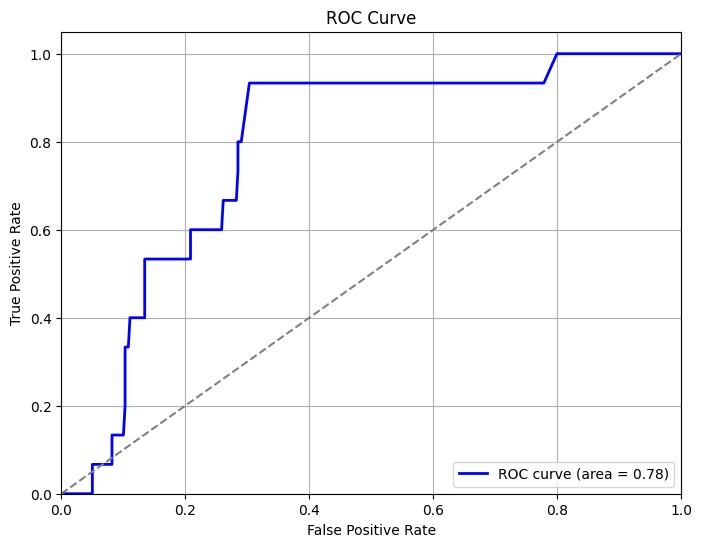

In [47]:
# ROC-curve
fpr, tpr, thresholds = roc_curve(df['Статус'], df['PD для 2-х'])

# ROC-AUC
roc_auc = auc(fpr, tpr)

# Graphic 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [48]:
# KS coef
good = df[df['Статус'] == 0]['PD для 2-х']
bad = df[df['Статус'] == 1]['PD для 2-х']

ks_stat, p_value = ks_2samp(good, bad)

ks_stat

0.6299032541776605

C:\Users\Роман Ковалёв\AppData\Local\Temp\ipykernel_25052\2807251571.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_good['PD для 2-х'], label='Good', shade=True)
C:\Users\Роман Ковалёв\AppData\Local\Temp\ipykernel_25052\2807251571.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_default['PD для 2-х'], label='Default', shade=True)


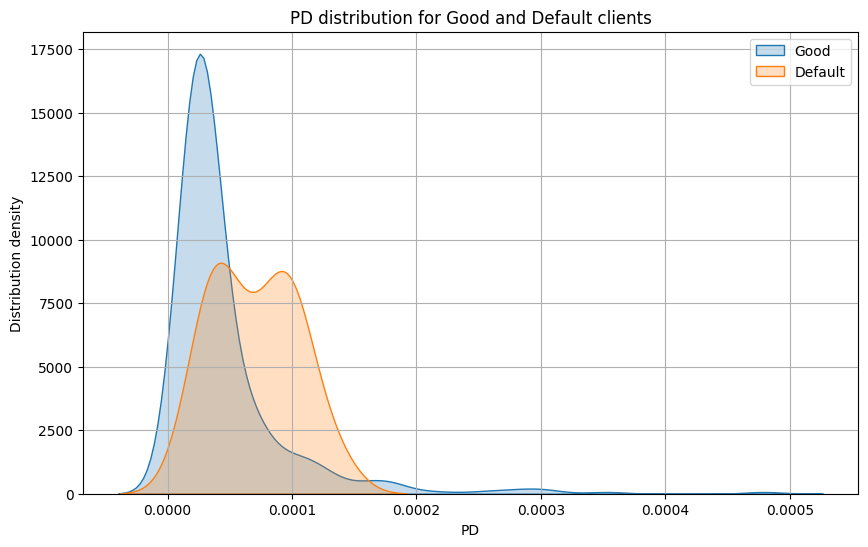

In [49]:
# PD для 2-х str -> int
df['PD для 2-х'] = df['PD для 2-х'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float) / 100

# Divide into 2 groups
df_good = df[df['Статус'] == 0]
df_default = df[df['Статус'] == 1]

# Graphic
plt.figure(figsize=(10, 6))
sns.kdeplot(df_good['PD для 2-х'], label='Good', shade=True)
sns.kdeplot(df_default['PD для 2-х'], label='Default', shade=True)

plt.title('PD distribution for Good and Default clients')
plt.xlabel('PD')
plt.ylabel('Distribution density')
plt.legend()
plt.grid(True)
plt.show()
